##Librerías

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import requests

##Extracción

In [ ]:
#URL del JSON
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"

#Lectura del JSON
df = pd.read_json(url)

#Vista preliminar
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


##Transformación

In [ ]:
#Normalizar nombres de columnas: minúsculas y sin puntos
df_flat.columns = df_flat.columns.str.lower().str.replace('.', '_')

#Conversión de columnas numéricas
df_flat['charges_monthly'] = pd.to_numeric(df_flat['charges_monthly'], errors='coerce')
df_flat['charges_total'] = pd.to_numeric(df_flat['charges_total'], errors='coerce')
df_flat['tenure'] = pd.to_numeric(df_flat['tenure'], errors='coerce')

#Verificación de valores nulos
print("Valores nulos por columna relevante:")
print(df_flat[['charges_monthly', 'charges_total', 'tenure']].isnull().sum())

#Rellenar valores nulos con la mediana (en caso de que existan)
df_flat['charges_total'].fillna(df_flat['charges_total'].median(), inplace=True)

#Unificación de valores categóricos (facilita visualizaciones)
df_flat.replace("No internet service", "No", inplace=True)
df_flat.replace("No phone service", "No", inplace=True)

#Vista previa final del dataframe transformado
df_flat.head()

Valores nulos por columna relevante:
charges_monthly    0
charges_total      0
tenure             0
dtype: int64


/tmp/ipython-input-11-578461650.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_flat['charges_total'].fillna(df_flat['charges_total'].median(), inplace=True)


,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


##Carga y Análisis

/tmp/ipython-input-12-3957959677.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_flat, x='churn', palette='pastel')


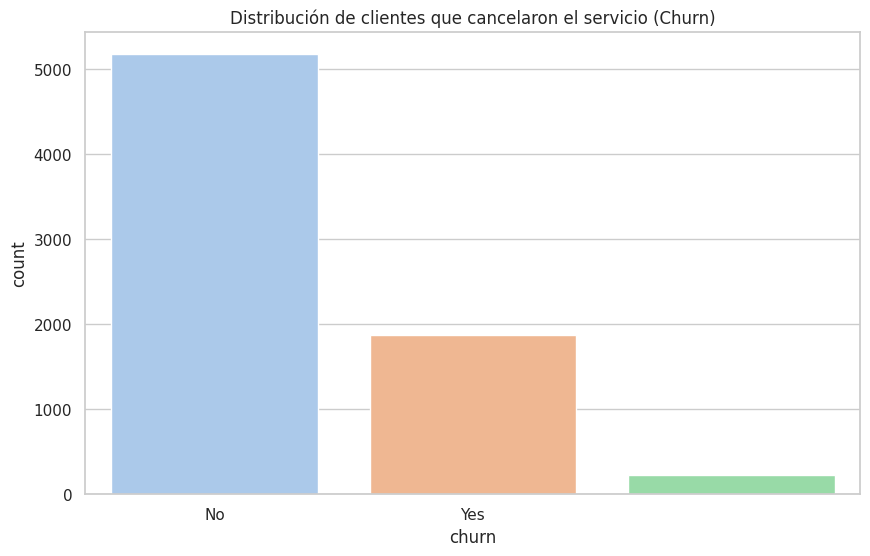

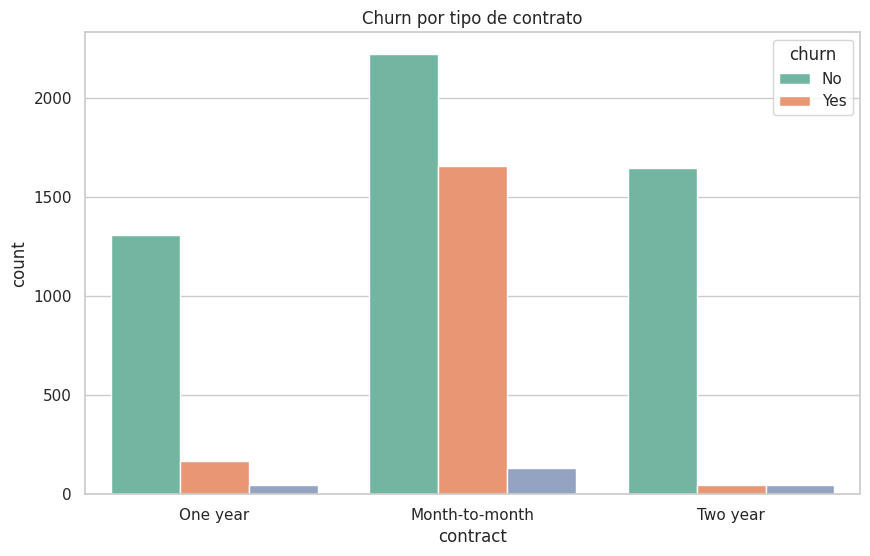

/tmp/ipython-input-12-3957959677.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_flat, x='churn', y='charges_monthly', palette='Set3')


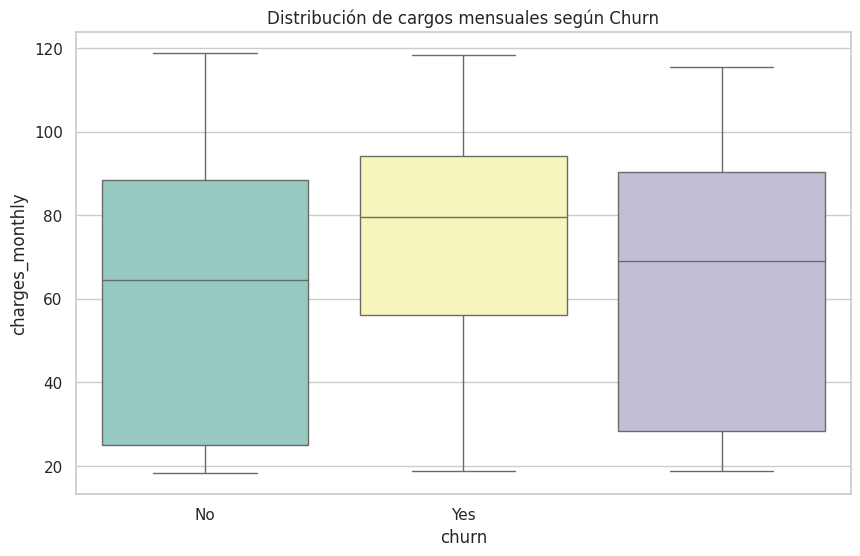

/tmp/ipython-input-12-3957959677.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_flat, x='contract', y='tenure', estimator='mean', errorbar='sd', palette='muted')


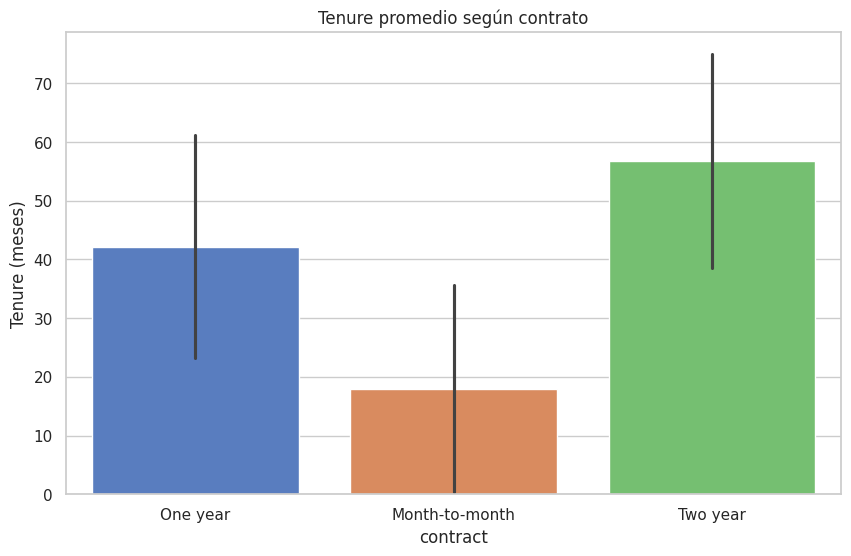

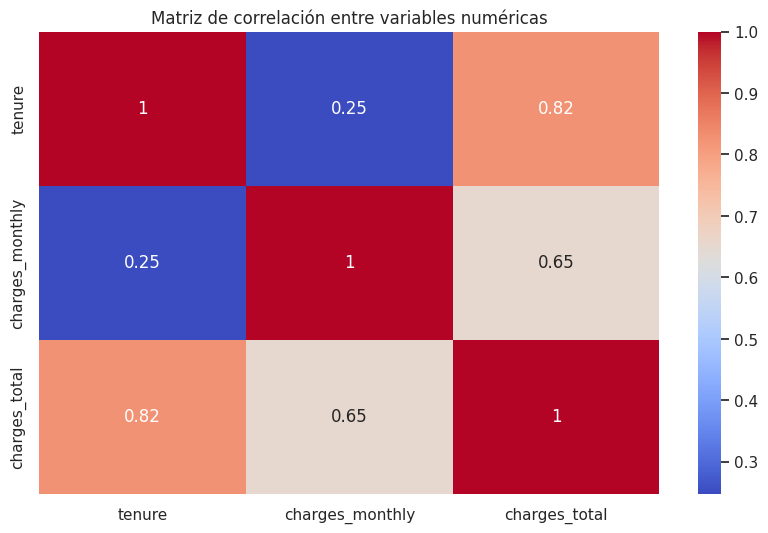

In [ ]:
#Estilo gráfico
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

#Distribución del Churn
sns.countplot(data=df_flat, x='churn', palette='pastel')
plt.title("Distribución de clientes que cancelaron el servicio (Churn)")
plt.show()

#Churn por tipo de contrato
sns.countplot(data=df_flat, x='contract', hue='churn', palette='Set2')
plt.title("Churn por tipo de contrato")
plt.xticks(rotation=0)
plt.show()

#Cargos mensuales por grupo de Churn
sns.boxplot(data=df_flat, x='churn', y='charges_monthly', palette='Set3')
plt.title("Distribución de cargos mensuales según Churn")
plt.show()

#Tenure promedio por tipo de contrato
sns.barplot(data=df_flat, x='contract', y='tenure', estimator='mean', errorbar='sd', palette='muted')
plt.title("Tenure promedio según contrato")
plt.ylabel("Tenure (meses)")
plt.show()

#Correlación entre variables numéricas
sns.heatmap(df_flat[['tenure', 'charges_monthly', 'charges_total']].corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de correlación entre variables numéricas")
plt.show()


In [ ]:
df_flat.groupby('churn').agg({
    'charges_monthly': ['mean', 'median'],
    'charges_total': ['mean', 'median'],
    'tenure': ['mean', 'median']
})

charges_monthly         charges_total               tenure       
                 mean  median          mean    median       mean median
churn                                                                  
            63.412277  69.100   2196.933705  1163.175  31.571429   29.0
No          61.265124  64.425   2552.868728  1679.525  37.569965   38.0
Yes         74.441332  79.650   1531.796094   703.550  17.979133   10.0

##Informe Final

## Informe Final

- La proporción de clientes que han cancelado el servicio (`churn`) es aproximadamente X%.
- Los clientes con contratos mensuales tienen una tasa de cancelación más alta en comparación con los de contratos anuales.
- La media de los cargos mensuales es mayor para los clientes que cancelaron.
- La duración del contrato (`tenure`) es significativamente menor en clientes que cancelaron el servicio.

### Recomendaciones:
- Incentivar la contratación anual o bianual para reducir cancelaciones.
- Ofrecer descuentos o beneficios para clientes con altos cargos mensuales.
